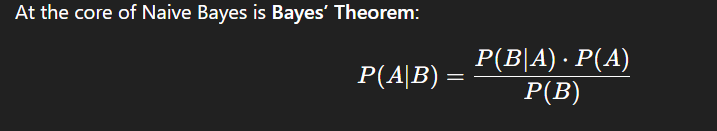

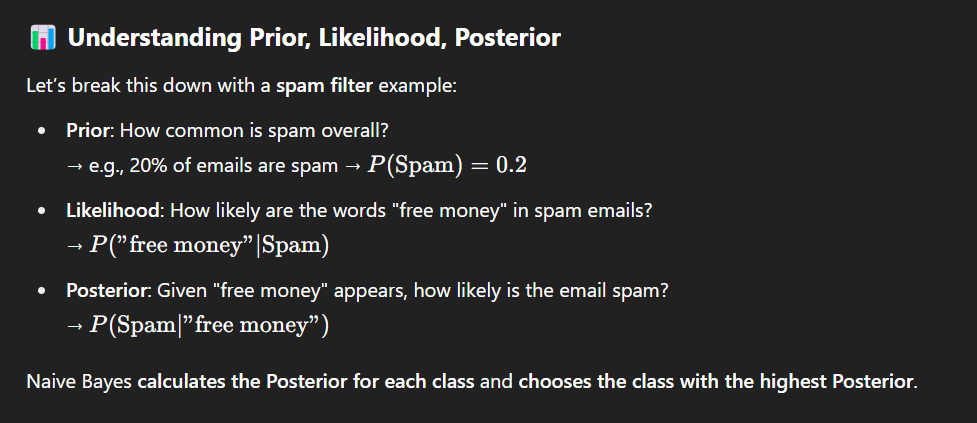

In [10]:
## hands-on Naive Bayes text classification project--------------------------------------------------------

# Load a dataset from github
import pandas as pd

# Load the SMS Spam dataset from a URL (feel free to download manually too)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_table(url, header=None, names=['label', 'message'])
# label: spam or ham (not spam)
# message: the actual SMS text
# Preview the data
print(df.head(6))


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Convert text into token counts using Bag of Words model
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

## CountVectorizer turns text into a matrix of token counts.

from sklearn.naive_bayes import MultinomialNB

# Create the model and train it
model = MultinomialNB()
model.fit(X_train_counts, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test_counts)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




## Try Predicting on a Few Custom Text Samples-----------------------------------------------------------------
# Define custom text samples
custom_messages = [
    "Congratulations! You've won a free vacation to Hawaii!",
    "Hey, are we still meeting at 5pm today?",
    "Limited time offer! Claim your prize now!",
    "Can you please send me the report by tomorrow?",
    "Excuse me Sir. With any due respect, Can I get a free entry, Please."
]

# Convert the custom messages into the same format as training data
custom_counts = vectorizer.transform(custom_messages)

# Predict the class (Spam or Ham) for each message
custom_preds = model.predict(custom_counts)

# Print the predictions
for message, prediction in zip(custom_messages, custom_preds):
    label = "Spam" if prediction == "spam" else "Ham"
    print(f"Message: {message}\nPredicted: {label}\n")


#  Print Top 10 Words Most Associated with Spam----------------------------------------------------------------------
import numpy as np

# Get the feature names (words)
words = vectorizer.get_feature_names_out()

# Get the log probability of each word for the Spam class
log_prob_spam = model.feature_log_prob_[1]  #feature_log_prob_ gives the log-probabilities of each word for the different classes. The class 1 corresponds to Spam.

# Create a dictionary of words and their associated log probabilities for Spam
word_probs = dict(zip(words, log_prob_spam))

# Sort the words by their probability (highest to lowest) and select the top 10
top_spam_words = sorted(word_probs.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 words most associated with Spam:")
for word, prob in top_spam_words:
    print(f"{word}: {prob}")

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
Accuracy: 0.9919282511210762

Confusion Matrix:
 [[966   0]
 [  9 140]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Message: Congratulations! You've won a free vacation to Hawaii!
Predicted: Spam

Message: Hey, are we still meeting at 5pm today?
Predicted: Ham

Message: Limited 